## In this first part, we define the benchmark functions we are going to use and create a function to plot any benckmark function that can be added in the future

In [15]:
import math
import random
import plotly.graph_objects as go
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

def rosenbrock(x, y):
    a = 0
    b = 1
    return (a-x)**2 + b*(y-x**2)**2

def rastrigin(x, y):
    n = 2
    return 10*n + (x**2 - 10*np.cos(2*math.pi*x)) + (y**2 - 10*np.cos(2*np.pi*y))

def plot_function(function):

    # benchmark function settings
    xmin = -2
    xmax = -xmin

    ymin = -2
    ymax = -ymin

    # plot x, y axis value settings
    xs = np.arange(xmin, xmax, 0.25)
    ys = np.arange(ymin, ymax, 0.25)
    X, Y = np.meshgrid(xs, ys)

    Z = function(X, Y)

    fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])
    fig.update_layout(title = function.__name__.capitalize(),
                    width=500, 
                    height=500,
                    margin=dict(l=65, r=50, b=65, t=90))

    return fig

In [16]:
rast = plot_function(rastrigin)
rosen = plot_function(rosenbrock)

# Create subplots
fig = make_subplots(rows=1, 
                    cols=2, 
                    subplot_titles=['Rastrigin', 'Rosenbrock'],
                    specs=[[{'type': 'surface'}, {'type': 'surface'}]]
                    )

# Plotting benchmark functions
fig.add_trace(rast.data[0], row=1, col=1)
fig.add_trace(rosen.data[0], row=1, col=2)

fig.show()

## Now we create the function that receives any benchmark function and runs PSO over it to try to find it's global minimum

In [17]:
def pso(function, b=1, c=2, return_frames=False):
    
    n = 10

    a = 0.7

    # Initializing 
    pis = [[1, 1]] * n
    zis = [-1] * n

    # Initializing global minimum
    zg = -1
    pg = []

    # Initializing positions
    xs = np.random.rand(n) 
    ys = np.random.rand(n)
    zs = np.array([rosenbrock(x, y) for x, y in zip(xs, ys)])

    # Initializing velocities
    vxs = np.random.uniform(-1, 1, n)
    vys = np.random.uniform(-1, 1, n)

    max_iter = 100

    zgs = []

    # Frames for the animation
    frames = []

    for _ in range(max_iter):
        for i in range(n):

            # update pi
            z = function(xs[i], ys[i])
            if zis[i] == -1 or z < zis[i]:
                zis[i] = z
                pis[i] = [xs[i], ys[i]]

            # update pg
            if zg == -1 or z < zg:
                zg = z 
                pg = [xs[i], ys[i]]

            # update velocity 
            r1x = random.random()
            r2x = random.random()

            r1y = random.random()
            r2y = random.random()

            vxs[i] = a*vxs[i] + b*r1x*(pis[i][0] - xs[i]) + c*r2x*(pg[0] - xs[i])
            vys[i] = a*vys[i] + b*r1y*(pis[i][1] - ys[i]) + c*r2y*(pg[1] - ys[i])

            # update position
            xs[i] = xs[i] + vxs[i]
            ys[i] = ys[i] + vys[i]
            zs[i] = function(xs[i], ys[i])


        frames.append([xs.copy(), ys.copy(), zs.copy()]) # [ [x1, x2...], [y1, y2...], [z1, z2...]]

        zgs.append(zg)

    if return_frames:
        return frames 

    return zgs

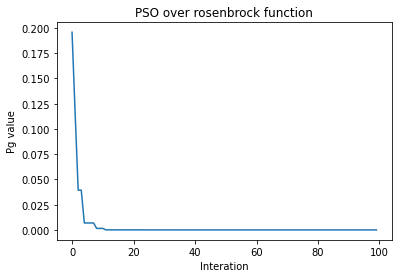

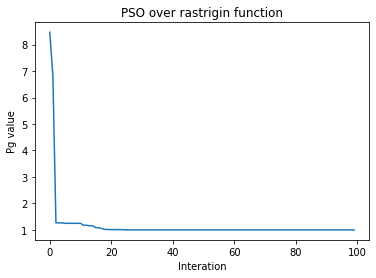

In [18]:
# Ploting PSO over rosenbrock
zs = pso(rosenbrock)
plt.plot(zs)
plt.title('PSO over rosenbrock function')
plt.xlabel('Interation')
plt.ylabel('Pg value')
plt.show()

# Ploting PSO over rastrigin
zs = pso(rastrigin)
plt.plot(zs)
plt.title('PSO over rastrigin function')
plt.xlabel('Interation')
plt.ylabel('Pg value')
plt.show()

In [36]:
import math
import random
import numpy as np

_rosenbrock = lambda x,y,a,b: (a - x) ** 2 + b * (y - x ** 2) ** 2

gradient_rosenbrock = lambda x, y, a, b: np.asarray([(-2 * a + 4 * b * x ** 3 - 4 * b * x * y + 2 * x), 2 * b * (y - x ** 2)])

gradient_rastrigin = lambda x, y: np.asarray([(2 * (x + 10 * math.pi * math.sin(2 * math.pi * x))), (2 * (y + 10 * math.pi * math.sin(2 * math.pi * y)))])

_rastrigin = lambda x, y: 10*2 + (x**2 - 10*np.cos(2*math.pi*x)) + (y**2 - 10*np.cos(2*np.pi*y))

def dzdx_ronsenbrock(x, y):
    # I have got something else here any idea why?
    a = 0
    return -2*a + 2*x - 4*y*x + 4*x**3

# Rosenbrock's derivative over y
def dzdy_ronsenbrock(x, y):
    b = 1
    return 2*b*y - 2*x**2

# Rastrigin's derivative over x
def dzdx_rastrigin(x):
    return 2*x - 20*math.pi*math.sin(2*math.pi*x)

# Rastrigin's derivative over y
def dzdy_rastrigin(y):
    return 2*y - 20*math.pi*math.sin(2*math.pi*y)

# Function to apply GD over functions
#def rastrigin(x, y):
#    pass


def gradient_descent(function_name):

    stepSize = 0.01
    x = random.uniform(-2, 2)
    y = random.uniform(-2, 2)

    # for rosenbrock only:
    a = 0
    b = 1
    if function_name == 'rosenbrock':
           history = [np.asarray([x,y,_rosenbrock(x, y, a, b)])]
    else:
        history = [np.asarray([x,y,_rastrigin(x, y)])]
    pos = [x,y]
    max_iter = 100
    for _ in range(max_iter):
        if function_name == 'rosenbrock':
            pos = pos - stepSize * gradient_rosenbrock(pos[0],pos[1], a, b)
            z = _rosenbrock(pos[0], pos[1], a, b)
        elif function_name == 'rastrigin':
            pos = pos - stepSize * gradient_rastrigin(pos[0],pos[1])
            z = _rastrigin(pos[0], pos[1])
        else:
            raise Exception('function_name must be rosenbrock or rastrigin')
        history.append(np.asarray([pos[0],pos[1],z]))
    return np.asarray(history)

[321.11524479  10.56553396   8.57116545   6.99996652   5.87631708
   5.14624808   4.71145253   4.47009683   4.34210388   4.2749819
   4.23847184   4.21664882   4.20164691   4.18974511   4.17923309
   4.16933922   4.15971939   4.15022123   4.14077749   4.13135854
   4.12195133   4.1125501    4.10315229   4.09375679   4.08436308
   4.07497094   4.06558028   4.05619106   4.04680325   4.03741686
   4.02803187   4.01864831   4.00926617   3.99988545   3.99050617
   3.98112832   3.97175192   3.96237698   3.95300349   3.94363146
   3.93426091   3.92489183   3.91552424   3.90615813   3.89679353
   3.88743043   3.87806884   3.86870877   3.85935023   3.84999321
   3.84063774   3.83128381   3.82193144   3.81258062   3.80323138
   3.79388371   3.78453762   3.77519312   3.76585022   3.75650892
   3.74716923   3.73783117   3.72849473   3.71915992   3.70982676
   3.70049525   3.6911654    3.68183721   3.6725107    3.66318587
   3.65386273   3.64454129   3.63522155   3.62590353   3.61658723
   3.607272

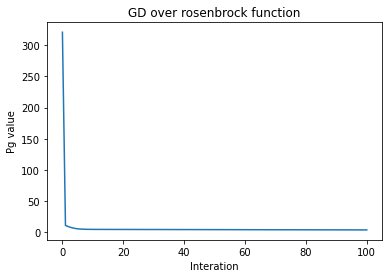

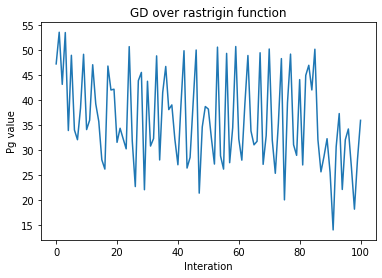

In [20]:
# Ploting GD over rosenbrock
zs = gradient_descent('rosenbrock')[:,2]
plt.plot(zs)
plt.title('GD over rosenbrock function')
plt.xlabel('Interation')
plt.ylabel('Pg value')
plt.show();

# Ploting GD over rastrigin
zs = gradient_descent('rastrigin')[:,2]
plt.plot(zs)
plt.title('GD over rastrigin function')
plt.xlabel('Interation')
plt.ylabel('Pg value')
plt.show();

In [21]:
# Function to run PSO and GD many times over a function, and return the distribution of the minimum values found
def compare_pso_and_gd_for_benchmark_function(function_name):

    final_pso_values = []
    final_gradient_descent_values = []
    n_executions = 50
    for _ in tqdm(range(n_executions)):

        # Execute PSO
        pso_history = pso(function_name)
        final_pso_values.append(pso_history[-1])

        # Execute gradient descent
        gd_history = gradient_descent(function_name.__name__)[:,2]
        final_gradient_descent_values.append(gd_history[-1])

    return final_pso_values, final_gradient_descent_values

In [22]:
# Function to plot the comparison of GD and PSO given a benchmark function
def plot_pso_gd_comparison(function_name):

    final_pso_values, final_gradient_descent_values = compare_pso_and_gd_for_benchmark_function(function_name)

    sns.kdeplot(final_pso_values)
    plt.axvline(np.mean(final_pso_values), ls='--', c='r');
    plt.xlabel('Pg')
    plt.title('PSO final values distribution after 50 executions')
    plt.show()

    sns.kdeplot(final_gradient_descent_values)
    plt.axvline(np.mean(final_gradient_descent_values), ls='--', c='r');
    plt.xlabel('Pg')
    plt.title('GD final values distribution after 50 executions')
    plt.show();

## After running the PSO and GD algorithms many times over the Rosenbrock function, we see that both of them find the mean minimum point near 0. However, PSO shows a smaller standard deviation, and GD shows more outliers.

100%|██████████| 50/50 [00:01<00:00, 34.12it/s]


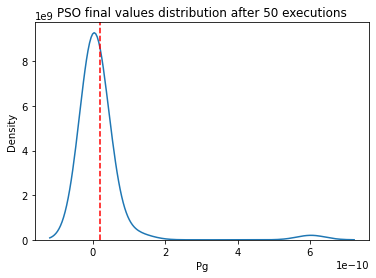

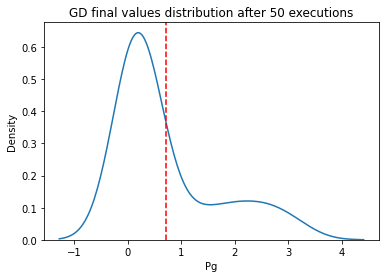

In [23]:
# Rosenbrock comparison between PSO and GD
plot_pso_gd_comparison(rosenbrock)

## After running the PSO and GD algorithms many times over the Rastrigin's function, we see that PSO is much more effective in finding the global minimum, dispite that it's performance over Rastringin is worse than it's own performance over Rosenbrock's function, due to the more complex nature of the function.
## GD performs very poorly over Rastringin's function, due to the high number of local minimas presented.

100%|██████████| 50/50 [00:02<00:00, 19.07it/s]


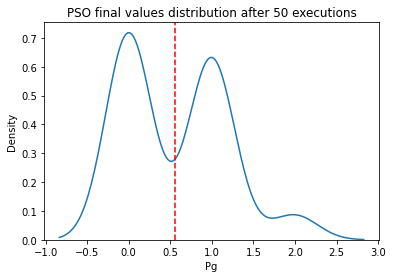

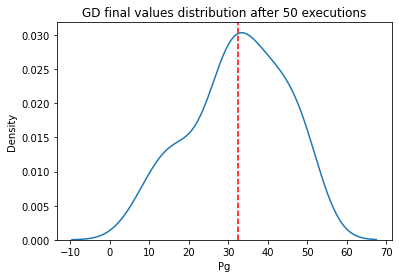

In [24]:
# Rastringin comparison between PSO and GD
plot_pso_gd_comparison(rastrigin)

In [25]:
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from IPython.core.display import HTML
from matplotlib import cm
    
def update(i, data, graph):
    graph._offsets3d = (data[i][0], data[i][1], data[i][2])
    graph.axes.view_init(azim=2*i)
    # ax.view_init(azim=angle)

def generate_visualization(data, function, save=True, alpha=0.5, file_name='animation'):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs = np.arange(-2, 2, 0.25)
    ys = np.arange(-2, 2, 0.25)
    X, Y = np.meshgrid(xs, ys)

    Z = function(X, Y)

    ax.plot_surface(X, Y, Z, alpha=alpha, cmap=cm.magma)
    graph = ax.scatter(data[0][0], data[0][1], data[0][2], c='black', s=10, alpha=0.7)


    # Number of iterations
    iterations = len(data)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Animated Scatter Example')
    ax.view_init(25, 10)

    fps = 10
    ani = animation.FuncAnimation(fig, 
                                  update, 
                                  iterations,
                                  fargs=(data, graph),
                                  interval=1000/fps)

    if save:
        Writer = animation.writers['ffmpeg']
        writer = Writer(fps=fps, 
                        extra_args=['-vcodec', 'libx264'])
        ani.save(f'{file_name}.mp4', writer=writer)

    return ani

In [ ]:
%pip install ffmpeg-python

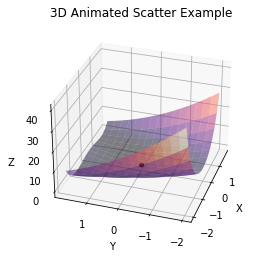

In [41]:
frames = pso(rosenbrock, return_frames=True)
ani = generate_visualization(np.array(frames), rosenbrock, file_name='RosenbrockPSO');

HTML(ani.to_html5_video())

(100, 3, 10)


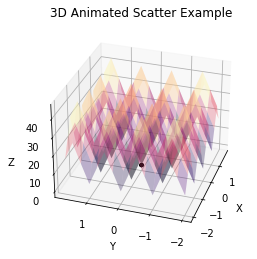

In [42]:
frames = pso(rastrigin, return_frames=True)
print(np.asarray(frames).shape)
ani = generate_visualization(np.array(frames), rastrigin, alpha=0.3, file_name='RastriginPSO');

HTML(ani.to_html5_video())

(101, 3)


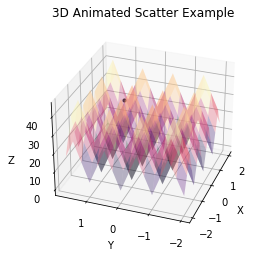

In [43]:
frames = gradient_descent('rastrigin')
print(frames.shape)
ani = generate_visualization(frames.reshape((101, 3,1)), rastrigin, alpha=0.3, file_name='RastriginGD');

HTML(ani.to_html5_video())

(101, 3)


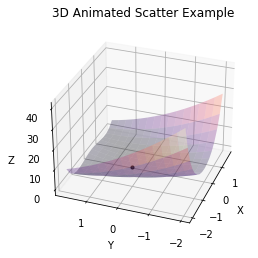

In [44]:
frames = gradient_descent('rosenbrock')
print(frames.shape)
ani = generate_visualization(frames.reshape((101, 3,1)), rosenbrock, alpha=0.3, file_name='RosenbrockGD');

HTML(ani.to_html5_video())

## Discussion on when to use DS together with PSO

PSO is an algorithm that searches randomly through a space. GD is an algorithm that uses information about the surface's inclination (gradient) to find its next step towards the minimum.

If applying gradient information to the PSO algorithm, that might contribute to the exploitation fase to converge faster.

In short, PSO can help in the phase of exploration, and GD can help on the phase of exploitation.

Paper: https://www.sciencedirect.com/science/article/abs/pii/S1568494611003206
